In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns= 100
pd.options.display.max_columns = 100
from keras.preprocessing.image import load_img

In [ ]:
#!unzip '/content/archive (4).zip'

In [2]:
Garbage_type =[]
Garbage_class = []
for class1 in os.listdir('/content/Garbage classification/Garbage classification'):
  for image in os.listdir('/content/Garbage classification/Garbage classification/'+class1):
    if class1 == 'cardboard':
      Garbage_class.append(1)
    elif class1 == 'glass':
      Garbage_class.append(2)
    elif class1 == 'metal':
      Garbage_class.append(3)
    elif class1 == 'paper':
      Garbage_class.append(4)
    elif class1 == 'plastic':
      Garbage_class.append(5)
    elif class1 == 'trash':
      Garbage_class.append(6)
    Garbage_type.append(os.path.join('/content/Garbage classification/Garbage classification',class1 ,image))

In [3]:
len(Garbage_type)

2527

In [ ]:
len(Garbage_class)

In [5]:
df = pd.DataFrame()

In [6]:
df['image_path'] = Garbage_type
df['label'] = Garbage_class

In [7]:
df.head(10)

,image_path,label
0,/content/Garbage classification/Garbage classi...,3
1,/content/Garbage classification/Garbage classi...,3
2,/content/Garbage classification/Garbage classi...,3
3,/content/Garbage classification/Garbage classi...,3
4,/content/Garbage classification/Garbage classi...,3
5,/content/Garbage classification/Garbage classi...,3
6,/content/Garbage classification/Garbage classi...,3
7,/content/Garbage classification/Garbage classi...,3
8,/content/Garbage classification/Garbage classi...,3
9,/content/Garbage classification/Garbage classi...,3


In [8]:
for i in df.columns:
  df[i] = df[i].astype('string')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  2527 non-null   string
 1   label       2527 non-null   string
dtypes: string(2)
memory usage: 39.6 KB


In [10]:
from keras.engine.training import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten,Dense,Input,Lambda
from keras.models import Sequential
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [11]:
vgg = VGG16(input_shape=[128,128]+[3],weights='imagenet',include_top=False)

In [12]:
for layer in vgg.layers:
  layer.trainable= False

In [13]:
x = Flatten()(vgg.output)

In [14]:
prediction = Dense(6,activation = 'softmax')(x)

In [15]:
model = Model(inputs = vgg.input, outputs = prediction)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [17]:
model.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics = ['Accuracy'])

In [18]:
#exploratory data analysis
random = np.random.choice(len(Garbage_class), 15, replace = True)

In [19]:
random

array([ 706, 2502,  707,  430, 1509,  796,  901, 1143,  628, 1482,  524,
       1789, 1761, 1424,  782])

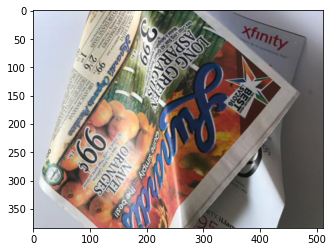

In [21]:
for i,j in enumerate(random):
  image1 = load_img(df.iloc[j]['image_path'])
  array = np.array(image1)
  plt.imshow(array)
  #print(array.shape)

(384, 512, 3)


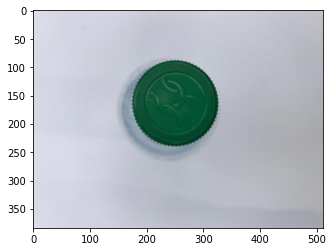

In [20]:
img = load_img(df.iloc[1805]['image_path'])
array = np.array(img)
plt.imshow(array)
print(array.shape)

In [22]:
notjpg = []
for i in range(len(Garbage_type)):
  if '.jpg' not in df.iloc[i]['image_path']:
    notjpg.append(i)

In [23]:
import PIL

In [24]:
notpil =[]
for i in df['image_path']:
  try:
    image2 = PIL.Image.open(i)
  except:
    notpil.append(i)

In [25]:
len(notpil)

0

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
from pandas.core.arrays.numeric import T
datagenerator = ImageDataGenerator(rescale=1./255,
                                   shear_range= 0.2,
                                   rotation_range = 0.4,
                                   zoom_range = 0.3,
                                   horizontal_flip=True,
                                   fill_mode = 'nearest')

In [28]:
images = datagenerator.flow_from_dataframe(df,
                                           x_col = 'image_path',
                                           y_col = 'label',
                                           target_size=(128,128), 
                                           batch_size=32,
                                           class_mode = 'categorical')

Found 2527 validated image filenames belonging to 6 classes.


In [29]:
image_path1 = []
label1 =[]
for i in os.listdir('/content/garbage classification/Garbage classification'):
  for j in os.listdir('/content/garbage classification/Garbage classification/'+i):
    if i== 'cardboard':
      label1.append(1)
    elif i == 'glass':
      label1.append(2)
    elif i == 'metal':
      label1.append(3)
    elif i == 'paper':
      label1.append(4)
    elif i == 'plastic':
      label1.append(5)
    elif i == 'trash':
      label1.append(6)
    image_path1.append(os.path.join('/content/Garbage classification/Garbage classification',i ,j))
  

In [30]:
len(image_path1)

2527

In [31]:
df1 = pd.DataFrame()
df1['image_path1'] = image_path1
df1['label1'] = label1


In [32]:
df1.head()

,image_path1,label1
0,/content/Garbage classification/Garbage classi...,3
1,/content/Garbage classification/Garbage classi...,3
2,/content/Garbage classification/Garbage classi...,3
3,/content/Garbage classification/Garbage classi...,3
4,/content/Garbage classification/Garbage classi...,3


In [33]:
for i in df1.columns:
  df1[i] = df1[i].astype('string')

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path1  2527 non-null   string
 1   label1       2527 non-null   string
dtypes: string(2)
memory usage: 39.6 KB


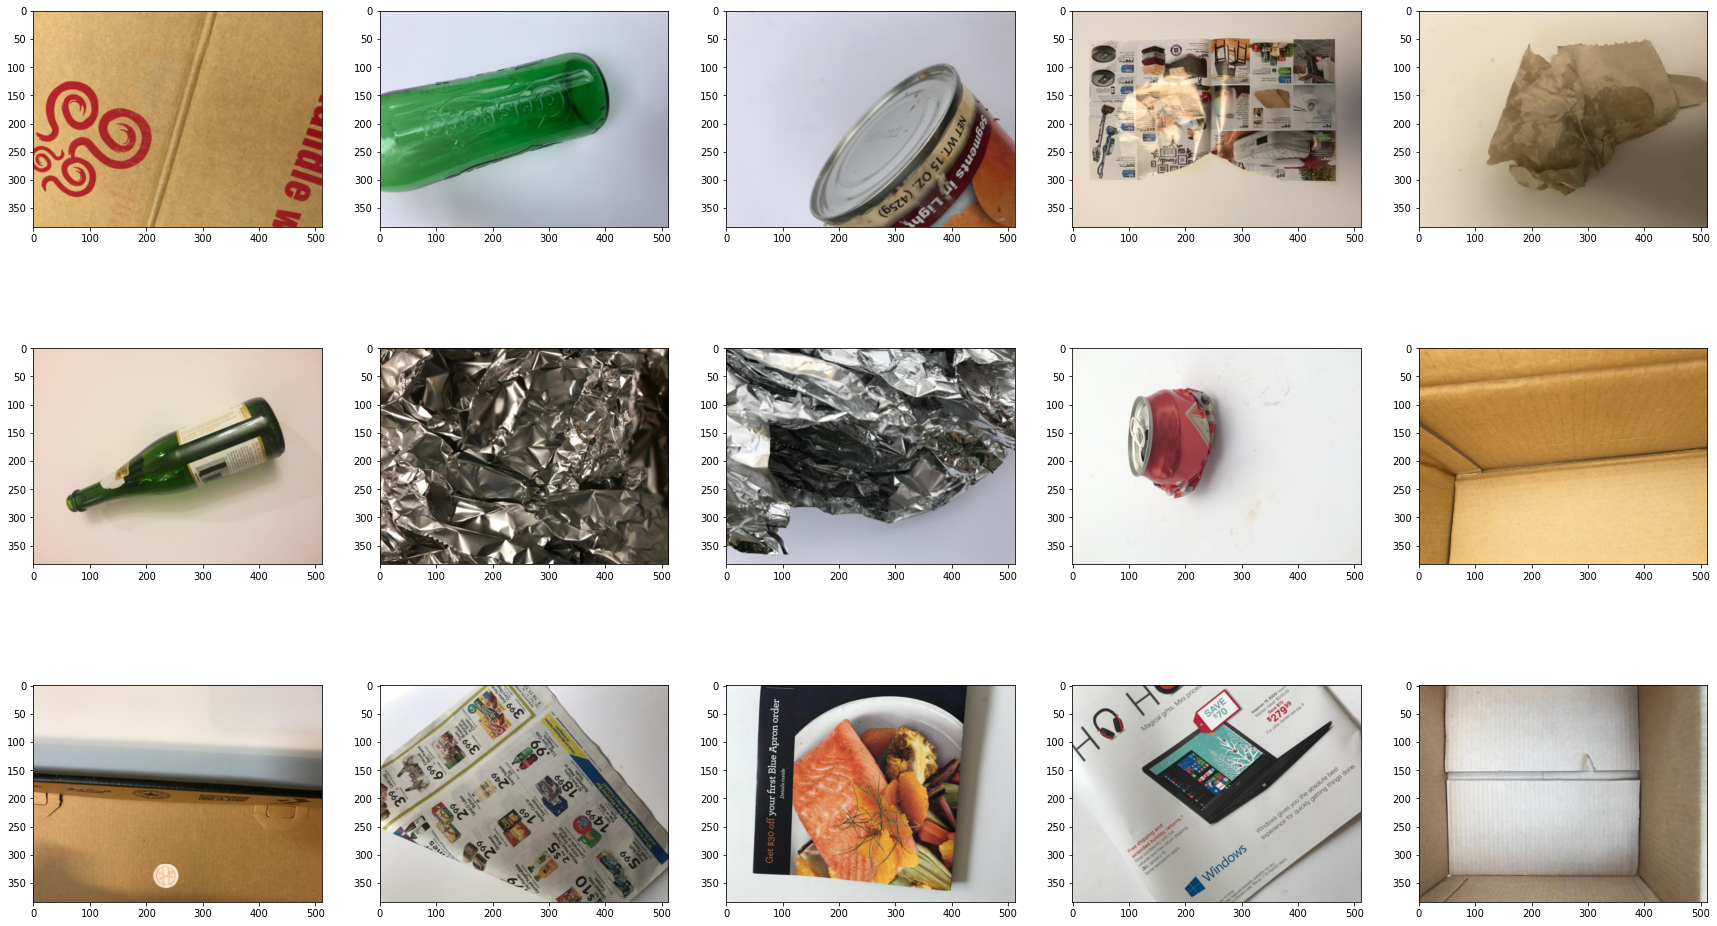

In [35]:
random1 = np.random.choice(len(image_path1),15,replace = True)
plt.figure(figsize =(30,30))
for i,j in enumerate(random1):
  image1 = load_img(df1.iloc[j]['image_path1'])
  array1 = np.array(image1)
  plt.subplot(5,5,i+1)
  plt.imshow(array1)


In [36]:
# building image datagenerators for test dataset

datagenerator1 = ImageDataGenerator(rescale = 1./255,
                                    zoom_range = 0.3,
                                    rotation_range= 0.4,
                                    shear_range = 0.3,
                                    horizontal_flip=True,
                                    fill_mode = 'nearest')

In [37]:
images1 = datagenerator1.flow_from_dataframe(df1,x_col= 'image_path1',
                                             y_col = 'label1',target_size = (128,128),
                                             batch_size = 32,class_mode = 'categorical')


Found 2527 validated image filenames belonging to 6 classes.


In [38]:
result = model.fit(images,validation_data=images1,epochs=5)

Epoch 1/5
79/79 [==============================] - 754s 10s/step - loss: 1.1934 - Accuracy: 0.5421 - val_loss: 0.9257 - val_Accuracy: 0.6474
Epoch 2/5
79/79 [==============================] - 753s 10s/step - loss: 0.8496 - Accuracy: 0.6870 - val_loss: 0.7377 - val_Accuracy: 0.7408
Epoch 3/5
79/79 [==============================] - 754s 10s/step - loss: 0.7475 - Accuracy: 0.7341 - val_loss: 0.6730 - val_Accuracy: 0.7606
Epoch 4/5
79/79 [==============================] - 759s 10s/step - loss: 0.6495 - Accuracy: 0.7669 - val_loss: 0.5926 - val_Accuracy: 0.8013
Epoch 5/5
79/79 [==============================] - 756s 10s/step - loss: 0.5889 - Accuracy: 0.7934 - val_loss: 0.5627 - val_Accuracy: 0.8093


Text(0.5, 1.0, 'Accuracy plot')

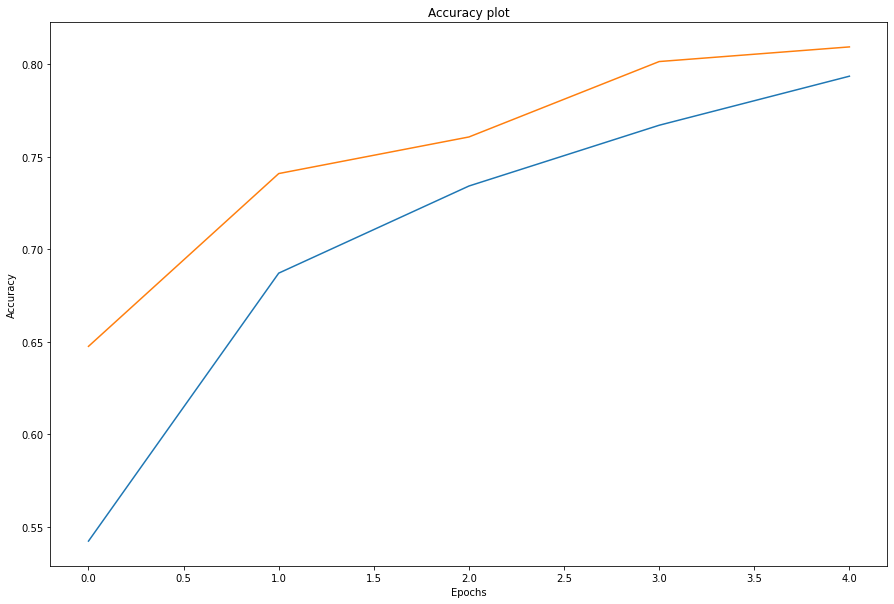

In [44]:
#plotting
plt.figure(figsize=(15,10))
plt.plot(range(5),result.history['Accuracy'])
plt.plot(range(5),result.history['val_Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

Text(0.5, 1.0, 'Loss Plot')

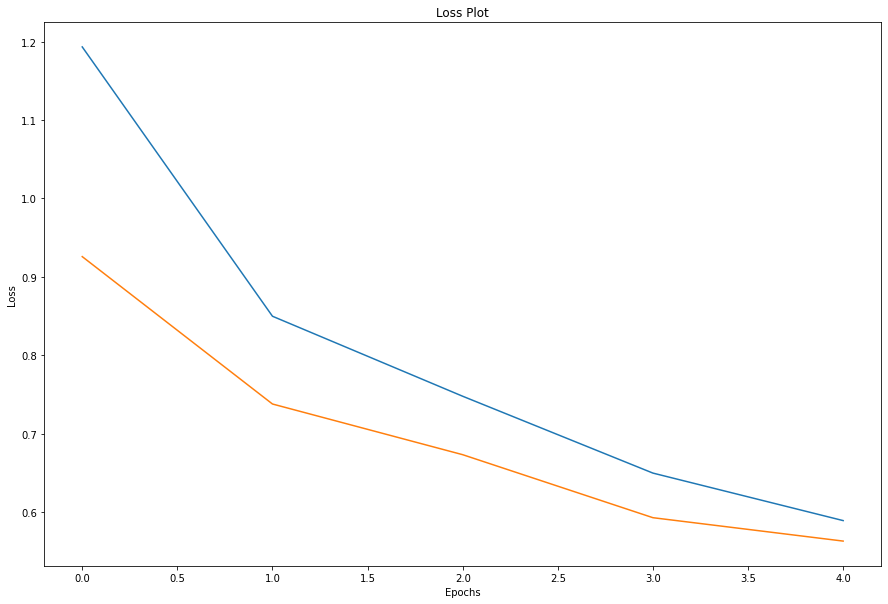

In [43]:
plt.figure(figsize= (15,10))
plt.plot(range(5),result.history['loss'])
plt.plot(range(5),result.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')